# 機械学習スクラッチ 線形回帰

線形回帰スクラッチ

In [222]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=1000, lr=1e-10, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.cost_list = []
#         self.theta = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        loss_list = []
        theta_list = []
        # パラメータθの初期値を入力trainデータのn_feature数分作成
        self.theta = np.random.rand(X.shape[1], 1)
#         print(X.shape[1], self.theta.shape)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
#             print(self.theta)
            X = np.insert(X, 0, 1, axis=1)
            
#         print('first theta': , self.theta)
        # 仮定関数で、初期状態での入力trainデータに対する予測値θを計算
        pred = self._linear_hypothesis(X=X)
        # 初期状態での予測値θを用いて損失関数を計算 
        first_loss, _ = self.cost_function(pred, y)
        loss_list.append(first_loss)
        theta_list.append(self.theta)
        for i in range(self.iter):
#             train_y_pred = _linear_hypothesis(X=X)
            error = pred[0] - y[0]
#             print(error) (n_samples,)
            self._gradient_descent(X=X, error=error, y=y)
#             print(self.theta)
            pred = self._linear_hypothesis(X=X)
#             print(pred.shape) (n_samples, 1)
            train_loss, _ = self.cost_function(pred, y)
#             pred = self._linear_hypothesis(X=X, theta=theta)
            loss_list.append(train_loss)
            theta_list.append(self.theta)
            self.cost_list.append(train_loss)
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, train_loss))
        
        min_loss_number = np.argmin(loss_list)
        self.theta = theta_list[min_loss_number]
        print(self.theta.shape)
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # 問題3
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        pred = self._linear_hypothesis(X=X)
        return pred
    
    # 問題1
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
#         self.theta = np.random.rand(1, X.shape[1])
        h = np.dot(X, self.theta)
        return h
    
    # 問題2
    def _gradient_descent(self, X, error, y):
        """
        パラメータthetaを更新する
        Parameters
        --------------------
        X:入力データ shape (n_samples, n_features)
        error:予測された目的変数 - 実際の目的変数 shape (n_samples, 1)
        y:実際の目的変数 shape (n_samples, 1)

        return
        --------------
        self.theta:更新後のtheta shape (n_samples, 1)
        """
        tmp = error - y
        tmp = tmp.reshape(-1, 1)
        error_times_x = np.dot(tmp.T, X)
        met_sum = np.sum(error_times_x, axis=0)
#         print(met_sum.shape, self.theta.shape)
        for j in range(X.shape[1]):
            self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])

    # 問題5
    def cost_function(self, y_pred, y):
        """
        平均二乗誤差の計算
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値
        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
#         print(y_pred.shape, y_pred)
        loss = np.sum((y_pred[0] - y[0])**2) / y.shape[0] * 2
        self.loss = loss
        self.val_loss = loss
        return self.loss, self.val_loss

【問題1】仮定関数

In [134]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ
    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
    """
#   self.theta = np.random.rand(1, X.shape[1])
    h = np.dot(X, self.theta)
    return h

【問題2】最急降下法

In [209]:
def _gradient_descent(self, X, error, y):
    """
    パラメータthetaを更新する
    Parameters
    --------------------
    X:入力データ shape (n_samples, n_features)
    error:予測された目的変数 - 実際の目的変数 shape (n_samples, 1)
    y:実際の目的変数 shape (n_samples, 1)

    return
    --------------
    self.theta:更新後のtheta shape (n_samples, 1)
    """
    tmp = error - y
    tmp = tmp.reshape(-1, 1)
    error_times_x = np.dot(tmp.T, X)
    met_sum = np.sum(error_times_x, axis=0)
#   print(met_sum.shape, self.theta.shape)
    for j in range(X.shape[1]):
        self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])

【問題3】推定

In [ ]:
def predict(self, X):
    """
    線形回帰を使い推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    # 問題3
    if self.bias:
        X = np.insert(X, 0, 1, axis=1)
    pred = self._linear_hypothesis(X=X)
    return pred

【問題4】平均二乗誤差

In [127]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.sum((y_pred[0] - y[0])**2) / y.shape[0]
    return mse

【問題5】目的関数

In [174]:
def cost_function(self, y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
    y : 次の形のndarray, shape (n_samples,)
        正解値
    Returns
    ----------
    mse : numpy.float
        平均二乗誤差
    """
#   print(y_pred.shape, y_pred)
    loss = np.sum((y_pred[0] - y[0])**2) / y.shape[0] * 2
    self.loss = loss
    self.val_loss = loss
    return self.loss, self.val_loss

【問題6】学習と推定

In [10]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter=5000, lr=1e-10, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.cost_list = []
        self.val_cost_list = []
#         self.theta = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        loss_list = []
        theta_list = []
        # パラメータθの初期値を入力trainデータのn_feature数分作成
        self.theta = np.random.rand(X.shape[1], 1)
#         print(X.shape[1], self.theta.shape)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
#             print(self.theta)
            X = np.insert(X, 0, 1, axis=1)
            
#         print('first theta': , self.theta)
        # 仮定関数で、初期状態での入力trainデータに対する予測値θを計算
        pred = self._linear_hypothesis(X=X)
        # 初期状態での予測値θを用いて損失関数を計算 
        first_loss, _ = self.cost_function(pred, y)
        loss_list.append(first_loss)
        theta_list.append(self.theta)
        for i in range(self.iter):
#             train_y_pred = _linear_hypothesis(X=X)
            error = pred[0] - y[0]
#             print(error) (n_samples,)
            self._gradient_descent(X=X, error=error, y=y)
#             print(self.theta)
            pred = self._linear_hypothesis(X=X)
#             print(pred.shape) (n_samples, 1)
            train_loss, _ = self.cost_function(pred, y)
#             pred = self._linear_hypothesis(X=X, theta=theta)
            loss_list.append(train_loss)
            theta_list.append(self.theta)
            self.cost_list.append(train_loss)
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, train_loss))
        
        min_loss_number = np.argmin(loss_list)
        self.theta = theta_list[min_loss_number]
        print(self.theta.shape)
        
        if X_val.all() == True and y_val.all() == True:
            self.val_theta = np.random.rand(X_val.shape[1], 1)
            if self.bias:
                theta_bias = np.ones((1,1))
                self.val_theta = np.insert(self.val_theta, 0, theta_bias)
    #             print(self.theta)
                X_val = np.insert(X_val, 0, 1, axis=1)
            val_pred = self._linear_hypothesis(X=X_val)
            
            for i in range(self.iter):
    #             train_y_pred = _linear_hypothesis(X=X)
                val_error = val_pred[0] - y_val[0]
    #             print(error) (n_samples,)
                self._gradient_descent(X=X_val, error=val_error, y=y_val)
    #             print(self.theta)
                val_pred = self._linear_hypothesis(X=X_val)
    #             print(pred.shape) (n_samples, 1)
                _, val_loss = self.cost_function(val_pred, y_val)
    #             pred = self._linear_hypothesis(X=X, theta=theta)
                loss_list.append(val_loss)
                theta_list.append(self.theta)
                self.val_cost_list.append(val_loss)
                if self.verbose:
                    #verboseをTrueにした際は学習過程を出力
                    print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, val_loss))
                
            

        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        # 問題3
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        pred = self._linear_hypothesis(X=X)
        return pred
    
    # 問題1
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
#         self.theta = np.random.rand(1, X.shape[1])
        h = np.dot(X, self.theta)
        return h
    
    # 問題2
    def _gradient_descent(self, X, error, y):
        """
        パラメータthetaを更新する
        Parameters
        --------------------
        X:入力データ shape (n_samples, n_features)
        error:予測された目的変数 - 実際の目的変数 shape (n_samples, 1)
        y:実際の目的変数 shape (n_samples, 1)

        return
        --------------
        self.theta:更新後のtheta shape (n_samples, 1)
        """
        tmp = error - y
        tmp = tmp.reshape(-1, 1)
#         error_times_x = np.dot(tmp.T, X)
        error_times_x = tmp * X
        met_sum = np.sum(error_times_x, axis=0)
#         print(met_sum.shape, self.theta.shape)
        for j in range(X.shape[1]):
            self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])

    # 問題5
    def cost_function(self, y_pred, y):
        """
        平均二乗誤差の計算
        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値
        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
#         print(y_pred.shape, y_pred)
        loss = np.sum((y_pred[0] - y[0])**2) / y.shape[0] / 2
        self.loss = loss
        self.val_loss = loss
        return self.loss, self.val_loss

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

DIR_PATH = '/Users/sasanoshouta/Desktop/DIVE_INTO_CODE/python/week4/house-prices-advanced-regression-techniques/'
train = pd.read_csv(DIR_PATH + 'train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# train['GrLivArea'] = train['GrLivArea'].apply(np.log)
# train['SalePrice'] = train['SalePrice'].apply(np.log)
x_train = train[['GrLivArea', 'YearBuilt']]
target = train['SalePrice']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x_train, target, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
LR = ScratchLinearRegression(bias=True, verbose=True)
LR.fit(X_train, y_train, X_test, y_test)

1 / 5000 times done | loss value: 27148438.831706874
2 / 5000 times done | loss value: 27082138.53033724
3 / 5000 times done | loss value: 27015965.360859625
4 / 5000 times done | loss value: 26949919.122050673
5 / 5000 times done | loss value: 26883999.612984017
6 / 5000 times done | loss value: 26818206.633029863
7 / 5000 times done | loss value: 26752539.981854547
8 / 5000 times done | loss value: 26686999.45942011
9 / 5000 times done | loss value: 26621584.8659839
10 / 5000 times done | loss value: 26556296.002098132
11 / 5000 times done | loss value: 26491132.668609448
12 / 5000 times done | loss value: 26426094.666658536
13 / 5000 times done | loss value: 26361181.79767967
14 / 5000 times done | loss value: 26296393.86340031
15 / 5000 times done | loss value: 26231730.665840693
16 / 5000 times done | loss value: 26167192.007313382
17 / 5000 times done | loss value: 26102777.690422878
18 / 5000 times done | loss value: 26038487.518065173
19 / 5000 times done | loss value: 25974321

586 / 5000 times done | loss value: 4624582.325309599
587 / 5000 times done | loss value: 4606382.396977592
588 / 5000 times done | loss value: 4588230.985823307
589 / 5000 times done | loss value: 4570128.008171195
590 / 5000 times done | loss value: 4552073.380473421
591 / 5000 times done | loss value: 4534067.019309689
592 / 5000 times done | loss value: 4516108.841387029
593 / 5000 times done | loss value: 4498198.763539624
594 / 5000 times done | loss value: 4480336.702728646
595 / 5000 times done | loss value: 4462522.576042034
596 / 5000 times done | loss value: 4444756.3006943455
597 / 5000 times done | loss value: 4427037.794026545
598 / 5000 times done | loss value: 4409366.973505838
599 / 5000 times done | loss value: 4391743.756725479
600 / 5000 times done | loss value: 4374168.061404588
601 / 5000 times done | loss value: 4356639.805387975
602 / 5000 times done | loss value: 4339158.906645945
603 / 5000 times done | loss value: 4321725.283274129
604 / 5000 times done | los

1147 / 5000 times done | loss value: 33407.2758089445
1148 / 5000 times done | loss value: 32367.89184741487
1149 / 5000 times done | loss value: 31345.639831371715
1150 / 5000 times done | loss value: 30340.48499314858
1151 / 5000 times done | loss value: 29352.392621077146
1152 / 5000 times done | loss value: 28381.328059404837
1153 / 5000 times done | loss value: 27427.256708211557
1154 / 5000 times done | loss value: 26490.144023326662
1155 / 5000 times done | loss value: 25569.955516245936
1156 / 5000 times done | loss value: 24666.656754049218
1157 / 5000 times done | loss value: 23780.21335931701
1158 / 5000 times done | loss value: 22910.591010048753
1159 / 5000 times done | loss value: 22057.755439580218
1160 / 5000 times done | loss value: 21221.672436500707
1161 / 5000 times done | loss value: 20402.307844571613
1162 / 5000 times done | loss value: 19599.627562643687
1163 / 5000 times done | loss value: 18813.597544575638
1164 / 5000 times done | loss value: 18044.1837991523

1593 / 5000 times done | loss value: 839581.1268407516
1594 / 5000 times done | loss value: 843435.0154954015
1595 / 5000 times done | loss value: 847295.0366635914
1596 / 5000 times done | loss value: 851161.173804459
1597 / 5000 times done | loss value: 855033.4104057489
1598 / 5000 times done | loss value: 858911.7299837557
1599 / 5000 times done | loss value: 862796.1160832844
1600 / 5000 times done | loss value: 866686.5522776042
1601 / 5000 times done | loss value: 870583.022168415
1602 / 5000 times done | loss value: 874485.5093857882
1603 / 5000 times done | loss value: 878393.9975881343
1604 / 5000 times done | loss value: 882308.4704621584
1605 / 5000 times done | loss value: 886228.9117228143
1606 / 5000 times done | loss value: 890155.3051132595
1607 / 5000 times done | loss value: 894087.634404823
1608 / 5000 times done | loss value: 898025.8833969391
1609 / 5000 times done | loss value: 901970.0359171367
1610 / 5000 times done | loss value: 905920.075820973
1611 / 5000 ti

2140 / 5000 times done | loss value: 3504777.9909752137
2141 / 5000 times done | loss value: 3510153.4290714655
2142 / 5000 times done | loss value: 3515529.239450297
2143 / 5000 times done | loss value: 3520905.416124789
2144 / 5000 times done | loss value: 3526281.9531201734
2145 / 5000 times done | loss value: 3531658.8444738034
2146 / 5000 times done | loss value: 3537036.0842351303
2147 / 5000 times done | loss value: 3542413.6664656894
2148 / 5000 times done | loss value: 3547791.585239087
2149 / 5000 times done | loss value: 3553169.834640959
2150 / 5000 times done | loss value: 3558548.4087689724
2151 / 5000 times done | loss value: 3563927.3017328
2152 / 5000 times done | loss value: 3569306.5076540993
2153 / 5000 times done | loss value: 3574686.020666498
2154 / 5000 times done | loss value: 3580065.8349155616
2155 / 5000 times done | loss value: 3585445.944558785
2156 / 5000 times done | loss value: 3590826.343765575
2157 / 5000 times done | loss value: 3596207.0267172335
21

2779 / 5000 times done | loss value: 6825279.072554453
2780 / 5000 times done | loss value: 6830084.954618517
2781 / 5000 times done | loss value: 6834889.180308982
2782 / 5000 times done | loss value: 6839691.748427181
2783 / 5000 times done | loss value: 6844492.657778501
2784 / 5000 times done | loss value: 6849291.907172477
2785 / 5000 times done | loss value: 6854089.495422731
2786 / 5000 times done | loss value: 6858885.421346926
2787 / 5000 times done | loss value: 6863679.6837668605
2788 / 5000 times done | loss value: 6868472.281508377
2789 / 5000 times done | loss value: 6873263.213401402
2790 / 5000 times done | loss value: 6878052.478279872
2791 / 5000 times done | loss value: 6882840.07498183
2792 / 5000 times done | loss value: 6887626.002349328
2793 / 5000 times done | loss value: 6892410.259228457
2794 / 5000 times done | loss value: 6897192.844469347
2795 / 5000 times done | loss value: 6901973.756926127
2796 / 5000 times done | loss value: 6906752.995456958
2797 / 500

3406 / 5000 times done | loss value: 9485639.249731414
3407 / 5000 times done | loss value: 9489299.920288805
3408 / 5000 times done | loss value: 9492958.747665262
3409 / 5000 times done | loss value: 9496615.732162083
3410 / 5000 times done | loss value: 9500270.874081668
3411 / 5000 times done | loss value: 9503924.173727572
3412 / 5000 times done | loss value: 9507575.631404547
3413 / 5000 times done | loss value: 9511225.247418456
3414 / 5000 times done | loss value: 9514873.02207632
3415 / 5000 times done | loss value: 9518518.955686307
3416 / 5000 times done | loss value: 9522163.04855771
3417 / 5000 times done | loss value: 9525805.301000977
3418 / 5000 times done | loss value: 9529445.713327693
3419 / 5000 times done | loss value: 9533084.285850564
3420 / 5000 times done | loss value: 9536721.018883431
3421 / 5000 times done | loss value: 9540355.912741264
3422 / 5000 times done | loss value: 9543988.967740158
3423 / 5000 times done | loss value: 9547620.184197335
3424 / 5000 

4026 / 5000 times done | loss value: 11418804.5368119
4027 / 5000 times done | loss value: 11421412.412329283
4028 / 5000 times done | loss value: 11424018.769622082
4029 / 5000 times done | loss value: 11426623.60933331
4030 / 5000 times done | loss value: 11429226.932106068
4031 / 5000 times done | loss value: 11431828.738583589
4032 / 5000 times done | loss value: 11434429.029409254
4033 / 5000 times done | loss value: 11437027.805226553
4034 / 5000 times done | loss value: 11439625.066679094
4035 / 5000 times done | loss value: 11442220.814410634
4036 / 5000 times done | loss value: 11444815.049065039
4037 / 5000 times done | loss value: 11447407.771286285
4038 / 5000 times done | loss value: 11449998.981718473
4039 / 5000 times done | loss value: 11452588.681005865
4040 / 5000 times done | loss value: 11455176.869792793
4041 / 5000 times done | loss value: 11457763.548723731
4042 / 5000 times done | loss value: 11460348.718443267
4043 / 5000 times done | loss value: 11462932.37959

4493 / 5000 times done | loss value: 12482439.330057574
4494 / 5000 times done | loss value: 12484408.863584764
4495 / 5000 times done | loss value: 12486377.181071926
4496 / 5000 times done | loss value: 12488344.283149619
4497 / 5000 times done | loss value: 12490310.170448326
4498 / 5000 times done | loss value: 12492274.843598347
4499 / 5000 times done | loss value: 12494238.303229894
4500 / 5000 times done | loss value: 12496200.549973004
4501 / 5000 times done | loss value: 12498161.584457552
4502 / 5000 times done | loss value: 12500121.407313347
4503 / 5000 times done | loss value: 12502080.019169966
4504 / 5000 times done | loss value: 12504037.42065694
4505 / 5000 times done | loss value: 12505993.612403585
4506 / 5000 times done | loss value: 12507948.595039107
4507 / 5000 times done | loss value: 12509902.36919256
4508 / 5000 times done | loss value: 12511854.935492879
4509 / 5000 times done | loss value: 12513806.29456883
4510 / 5000 times done | loss value: 12515756.44704

4815 / 5000 times done | loss value: 13057190.512898127
4816 / 5000 times done | loss value: 13058800.188022923
4817 / 5000 times done | loss value: 13060408.84155494
4818 / 5000 times done | loss value: 13062016.474067483
4819 / 5000 times done | loss value: 13063623.086133664
4820 / 5000 times done | loss value: 13065228.678326353
4821 / 5000 times done | loss value: 13066833.251218246
4822 / 5000 times done | loss value: 13068436.805381818
4823 / 5000 times done | loss value: 13070039.341389328
4824 / 5000 times done | loss value: 13071640.859812835
4825 / 5000 times done | loss value: 13073241.3612242
4826 / 5000 times done | loss value: 13074840.846195053
4827 / 5000 times done | loss value: 13076439.315296857
4828 / 5000 times done | loss value: 13078036.769100817
4829 / 5000 times done | loss value: 13079633.208177952
4830 / 5000 times done | loss value: 13081228.633099094
4831 / 5000 times done | loss value: 13082823.04443482
4832 / 5000 times done | loss value: 13084416.442755

155 / 5000 times done | loss value: 113585852.27664126
156 / 5000 times done | loss value: 113542540.75752169
157 / 5000 times done | loss value: 113499268.40384161
158 / 5000 times done | loss value: 113456035.17587166
159 / 5000 times done | loss value: 113412841.03392754
160 / 5000 times done | loss value: 113369685.93837014
161 / 5000 times done | loss value: 113326569.84960532
162 / 5000 times done | loss value: 113283492.72808395
163 / 5000 times done | loss value: 113240454.53430195
164 / 5000 times done | loss value: 113197455.22879988
165 / 5000 times done | loss value: 113154494.77216332
166 / 5000 times done | loss value: 113111573.1250226
167 / 5000 times done | loss value: 113068690.2480527
168 / 5000 times done | loss value: 113025846.10197331
169 / 5000 times done | loss value: 112983040.64754863
170 / 5000 times done | loss value: 112940273.84558761
171 / 5000 times done | loss value: 112897545.6569434
172 / 5000 times done | loss value: 112854856.04251377
173 / 5000 ti

560 / 5000 times done | loss value: 98857498.86924762
561 / 5000 times done | loss value: 98827239.33358598
562 / 5000 times done | loss value: 98797006.02359742
563 / 5000 times done | loss value: 98766798.91395967
564 / 5000 times done | loss value: 98736617.97937788
565 / 5000 times done | loss value: 98706463.19458479
566 / 5000 times done | loss value: 98676334.53434035
567 / 5000 times done | loss value: 98646231.97343206
568 / 5000 times done | loss value: 98616155.4866748
569 / 5000 times done | loss value: 98586105.04891083
570 / 5000 times done | loss value: 98556080.63500944
571 / 5000 times done | loss value: 98526082.21986751
572 / 5000 times done | loss value: 98496109.77840889
573 / 5000 times done | loss value: 98466163.28558493
574 / 5000 times done | loss value: 98436242.71637389
575 / 5000 times done | loss value: 98406348.0457812
576 / 5000 times done | loss value: 98376479.24883954
577 / 5000 times done | loss value: 98346636.30060843
578 / 5000 times done | loss v

877 / 5000 times done | loss value: 90456145.63568668
878 / 5000 times done | loss value: 90433063.3329321
879 / 5000 times done | loss value: 90410000.44824393
880 / 5000 times done | loss value: 90386956.96356314
881 / 5000 times done | loss value: 90363932.86084953
882 / 5000 times done | loss value: 90340928.12208161
883 / 5000 times done | loss value: 90317942.72925694
884 / 5000 times done | loss value: 90294976.66439182
885 / 5000 times done | loss value: 90272029.90952118
886 / 5000 times done | loss value: 90249102.44669907
887 / 5000 times done | loss value: 90226194.25799799
888 / 5000 times done | loss value: 90203305.32550925
889 / 5000 times done | loss value: 90180435.63134293
890 / 5000 times done | loss value: 90157585.15762778
891 / 5000 times done | loss value: 90134753.88651112
892 / 5000 times done | loss value: 90111941.80015902
893 / 5000 times done | loss value: 90089148.88075608
894 / 5000 times done | loss value: 90066375.11050563
895 / 5000 times done | loss 

1162 / 5000 times done | loss value: 84599362.35128184
1163 / 5000 times done | loss value: 84581149.89989983
1164 / 5000 times done | loss value: 84562952.40678932
1165 / 5000 times done | loss value: 84544769.85847847
1166 / 5000 times done | loss value: 84526602.24150904
1167 / 5000 times done | loss value: 84508449.54243624
1168 / 5000 times done | loss value: 84490311.74782905
1169 / 5000 times done | loss value: 84472188.84426993
1170 / 5000 times done | loss value: 84454080.81835479
1171 / 5000 times done | loss value: 84435987.65669318
1172 / 5000 times done | loss value: 84417909.34590812
1173 / 5000 times done | loss value: 84399845.87263614
1174 / 5000 times done | loss value: 84381797.22352727
1175 / 5000 times done | loss value: 84363763.38524497
1176 / 5000 times done | loss value: 84345744.3444661
1177 / 5000 times done | loss value: 84327740.08788115
1178 / 5000 times done | loss value: 84309750.60219377
1179 / 5000 times done | loss value: 84291775.8741213
1180 / 5000 

1617 / 5000 times done | loss value: 77669291.6032845
1618 / 5000 times done | loss value: 77656681.51643226
1619 / 5000 times done | loss value: 77644081.45312554
1620 / 5000 times done | loss value: 77631491.40475024
1621 / 5000 times done | loss value: 77618911.36270063
1622 / 5000 times done | loss value: 77606341.31837901
1623 / 5000 times done | loss value: 77593781.26319605
1624 / 5000 times done | loss value: 77581231.1885706
1625 / 5000 times done | loss value: 77568691.08592968
1626 / 5000 times done | loss value: 77556160.94670846
1627 / 5000 times done | loss value: 77543640.76235038
1628 / 5000 times done | loss value: 77531130.52430695
1629 / 5000 times done | loss value: 77518630.2240379
1630 / 5000 times done | loss value: 77506139.85301112
1631 / 5000 times done | loss value: 77493659.40270267
1632 / 5000 times done | loss value: 77481188.86459659
1633 / 5000 times done | loss value: 77468728.23018523
1634 / 5000 times done | loss value: 77456277.49096891
1635 / 5000 t

2067 / 5000 times done | loss value: 72890081.63414732
2068 / 5000 times done | loss value: 72881222.62045021
2069 / 5000 times done | loss value: 72872370.46800333
2070 / 5000 times done | loss value: 72863525.17114185
2071 / 5000 times done | loss value: 72854686.72420585
2072 / 5000 times done | loss value: 72845855.12154077
2073 / 5000 times done | loss value: 72837030.35749698
2074 / 5000 times done | loss value: 72828212.42643005
2075 / 5000 times done | loss value: 72819401.32270066
2076 / 5000 times done | loss value: 72810597.04067466
2077 / 5000 times done | loss value: 72801799.57472283
2078 / 5000 times done | loss value: 72793008.91922134
2079 / 5000 times done | loss value: 72784225.06855117
2080 / 5000 times done | loss value: 72775448.01709859
2081 / 5000 times done | loss value: 72766677.75925487
2082 / 5000 times done | loss value: 72757914.28941633
2083 / 5000 times done | loss value: 72749157.6019845
2084 / 5000 times done | loss value: 72740407.69136581
2085 / 5000

2445 / 5000 times done | loss value: 69983665.45883964
2446 / 5000 times done | loss value: 69977038.2112112
2447 / 5000 times done | loss value: 69970416.00748464
2448 / 5000 times done | loss value: 69963798.84361233
2449 / 5000 times done | loss value: 69957186.71555021
2450 / 5000 times done | loss value: 69950579.6192578
2451 / 5000 times done | loss value: 69943977.55069798
2452 / 5000 times done | loss value: 69937380.50583723
2453 / 5000 times done | loss value: 69930788.48064563
2454 / 5000 times done | loss value: 69924201.47109665
2455 / 5000 times done | loss value: 69917619.47316733
2456 / 5000 times done | loss value: 69911042.48283815
2457 / 5000 times done | loss value: 69904470.49609315
2458 / 5000 times done | loss value: 69897903.5089198
2459 / 5000 times done | loss value: 69891341.51730919
2460 / 5000 times done | loss value: 69884784.51725583
2461 / 5000 times done | loss value: 69878232.50475758
2462 / 5000 times done | loss value: 69871685.47581604
2463 / 5000 t

2698 / 5000 times done | loss value: 68457526.63136782
2699 / 5000 times done | loss value: 68452055.32774855
2700 / 5000 times done | loss value: 68446588.14788096
2701 / 5000 times done | loss value: 68441125.08850984
2702 / 5000 times done | loss value: 68435666.14638281
2703 / 5000 times done | loss value: 68430211.31825024
2704 / 5000 times done | loss value: 68424760.60086526
2705 / 5000 times done | loss value: 68419313.99098372
2706 / 5000 times done | loss value: 68413871.48536438
2707 / 5000 times done | loss value: 68408433.08076853
2708 / 5000 times done | loss value: 68402998.77396035
2709 / 5000 times done | loss value: 68397568.56170678
2710 / 5000 times done | loss value: 68392142.44077751
2711 / 5000 times done | loss value: 68386720.40794486
2712 / 5000 times done | loss value: 68381302.45998397
2713 / 5000 times done | loss value: 68375888.59367283
2714 / 5000 times done | loss value: 68370478.80579196
2715 / 5000 times done | loss value: 68365073.09312476
2716 / 500

2954 / 5000 times done | loss value: 67182938.30107304
2955 / 5000 times done | loss value: 67178423.64641842
2956 / 5000 times done | loss value: 67173912.36579213
2957 / 5000 times done | loss value: 67169404.45656952
2958 / 5000 times done | loss value: 67164899.9161283
2959 / 5000 times done | loss value: 67160398.74184813
2960 / 5000 times done | loss value: 67155900.93111107
2961 / 5000 times done | loss value: 67151406.48130128
2962 / 5000 times done | loss value: 67146915.38980494
2963 / 5000 times done | loss value: 67142427.65401064
2964 / 5000 times done | loss value: 67137943.27130897
2965 / 5000 times done | loss value: 67133462.23909278
2966 / 5000 times done | loss value: 67128984.55475709
2967 / 5000 times done | loss value: 67124510.21569897
2968 / 5000 times done | loss value: 67120039.21931773
2969 / 5000 times done | loss value: 67115571.56301492
2970 / 5000 times done | loss value: 67111107.24419416
2971 / 5000 times done | loss value: 67106646.26026124
2972 / 5000

3377 / 5000 times done | loss value: 65544172.417624615
3378 / 5000 times done | loss value: 65540875.63712265
3379 / 5000 times done | loss value: 65537581.29263946
3380 / 5000 times done | loss value: 65534289.38231815
3381 / 5000 times done | loss value: 65530999.904303096
3382 / 5000 times done | loss value: 65527712.85674035
3383 / 5000 times done | loss value: 65524428.2377774
3384 / 5000 times done | loss value: 65521146.04556325
3385 / 5000 times done | loss value: 65517866.278248355
3386 / 5000 times done | loss value: 65514588.933984585
3387 / 5000 times done | loss value: 65511314.01092545
3388 / 5000 times done | loss value: 65508041.50722592
3389 / 5000 times done | loss value: 65504771.421042375
3390 / 5000 times done | loss value: 65501503.75053265
3391 / 5000 times done | loss value: 65498238.49385614
3392 / 5000 times done | loss value: 65494975.64917375
3393 / 5000 times done | loss value: 65491715.21464775
3394 / 5000 times done | loss value: 65488457.18844199
3395 /

3864 / 5000 times done | loss value: 64194581.553192
3865 / 5000 times done | loss value: 64192277.17785036
3866 / 5000 times done | loss value: 64189974.488654345
3867 / 5000 times done | loss value: 64187673.48434154
3868 / 5000 times done | loss value: 64185374.16365039
3869 / 5000 times done | loss value: 64183076.52532034
3870 / 5000 times done | loss value: 64180780.56809179
3871 / 5000 times done | loss value: 64178486.29070624
3872 / 5000 times done | loss value: 64176193.69190611
3873 / 5000 times done | loss value: 64173902.770434774
3874 / 5000 times done | loss value: 64171613.52503657
3875 / 5000 times done | loss value: 64169325.95445693
3876 / 5000 times done | loss value: 64167040.057442114
3877 / 5000 times done | loss value: 64164755.8327394
3878 / 5000 times done | loss value: 64162473.279097155
3879 / 5000 times done | loss value: 64160192.39526459
3880 / 5000 times done | loss value: 64157913.17999197
3881 / 5000 times done | loss value: 64155635.6320305
3882 / 500

4204 / 5000 times done | loss value: 63500579.28874765
4205 / 5000 times done | loss value: 63498781.41815575
4206 / 5000 times done | loss value: 63496984.85628194
4207 / 5000 times done | loss value: 63495189.60215586
4208 / 5000 times done | loss value: 63493395.65480775
4209 / 5000 times done | loss value: 63491603.01326872
4210 / 5000 times done | loss value: 63489811.67657055
4211 / 5000 times done | loss value: 63488021.64374589
4212 / 5000 times done | loss value: 63486232.913827844
4213 / 5000 times done | loss value: 63484445.485850595
4214 / 5000 times done | loss value: 63482659.35884881
4215 / 5000 times done | loss value: 63480874.53185813
4216 / 5000 times done | loss value: 63479091.003914714
4217 / 5000 times done | loss value: 63477308.77405555
4218 / 5000 times done | loss value: 63475527.84131847
4219 / 5000 times done | loss value: 63473748.20474179
4220 / 5000 times done | loss value: 63471969.86336478
4221 / 5000 times done | loss value: 63470192.81622743
4222 / 

4494 / 5000 times done | loss value: 63030340.034565665
4495 / 5000 times done | loss value: 63028883.85513824
4496 / 5000 times done | loss value: 63027428.73191357
4497 / 5000 times done | loss value: 63025974.6641137
4498 / 5000 times done | loss value: 63024521.65096139
4499 / 5000 times done | loss value: 63023069.691679865
4500 / 5000 times done | loss value: 63021618.78549312
4501 / 5000 times done | loss value: 63020168.93162551
4502 / 5000 times done | loss value: 63018720.129302196
4503 / 5000 times done | loss value: 63017272.3777488
4504 / 5000 times done | loss value: 63015825.6761915
4505 / 5000 times done | loss value: 63014380.023857206
4506 / 5000 times done | loss value: 63012935.41997334
4507 / 5000 times done | loss value: 63011491.86376778
4508 / 5000 times done | loss value: 63010049.35446911
4509 / 5000 times done | loss value: 63008607.89130658
4510 / 5000 times done | loss value: 63007167.47350993
4511 / 5000 times done | loss value: 63005728.100309454
4512 / 5

4724 / 5000 times done | loss value: 62721741.58407836
4725 / 5000 times done | loss value: 62720508.974225305
4726 / 5000 times done | loss value: 62719277.25628994
4727 / 5000 times done | loss value: 62718046.429618366
4728 / 5000 times done | loss value: 62716816.4935572
4729 / 5000 times done | loss value: 62715587.447453514
4730 / 5000 times done | loss value: 62714359.290654786
4731 / 5000 times done | loss value: 62713132.02250918
4732 / 5000 times done | loss value: 62711905.64236522
4733 / 5000 times done | loss value: 62710680.149571925
4734 / 5000 times done | loss value: 62709455.54347885
4735 / 5000 times done | loss value: 62708231.82343599
4736 / 5000 times done | loss value: 62707008.98879386
4737 / 5000 times done | loss value: 62705787.03890341
4738 / 5000 times done | loss value: 62704565.97311625
4739 / 5000 times done | loss value: 62703345.79078421
4740 / 5000 times done | loss value: 62702126.49125976
4741 / 5000 times done | loss value: 62700908.07389587
4742 /

In [12]:
a = LR.predict(X_test)

【問題7】学習曲線のプロット

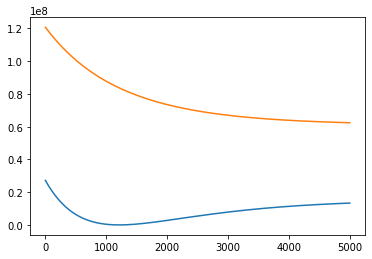

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(5000), LR.cost_list)
plt.plot(range(5000), LR.val_cost_list)
plt.show()

(大丈夫かこれ、あってんのか…？)

【問題8】（アドバンス課題）バイアス項の除去

In [216]:
# 初期値bias=False
no_bias_LR = ScratchLinearRegression(verbose=True)
no_bias_LR.fit(X_train, y_train)

1 / 1000 times done | loss value: 110584925.74485457
2 / 1000 times done | loss value: 110296573.33074486
3 / 1000 times done | loss value: 110008811.64517792
4 / 1000 times done | loss value: 109721639.6885082
5 / 1000 times done | loss value: 109435056.46266788
6 / 1000 times done | loss value: 109149060.9711644
7 / 1000 times done | loss value: 108863652.21907806
8 / 1000 times done | loss value: 108578829.21305968
9 / 1000 times done | loss value: 108294590.96132807
10 / 1000 times done | loss value: 108010936.47366774
11 / 1000 times done | loss value: 107727864.76142646
12 / 1000 times done | loss value: 107445374.83751287
13 / 1000 times done | loss value: 107163465.71639405
14 / 1000 times done | loss value: 106882136.41409321
15 / 1000 times done | loss value: 106601385.94818726
16 / 1000 times done | loss value: 106321213.33780448
17 / 1000 times done | loss value: 106041617.603622
18 / 1000 times done | loss value: 105762597.76786366
19 / 1000 times done | loss value: 105484

641 / 1000 times done | loss value: 12457685.561813047
642 / 1000 times done | loss value: 12397636.285523519
643 / 1000 times done | loss value: 12337776.638080113
644 / 1000 times done | loss value: 12278106.262545027
645 / 1000 times done | loss value: 12218624.802567458
646 / 1000 times done | loss value: 12159331.90238261
647 / 1000 times done | loss value: 12100227.206810823
648 / 1000 times done | loss value: 12041310.361256624
649 / 1000 times done | loss value: 11982581.011707861
650 / 1000 times done | loss value: 11924038.804734757
651 / 1000 times done | loss value: 11865683.387489038
652 / 1000 times done | loss value: 11807514.40770298
653 / 1000 times done | loss value: 11749531.513688538
654 / 1000 times done | loss value: 11691734.354336426
655 / 1000 times done | loss value: 11634122.579115225
656 / 1000 times done | loss value: 11576695.838070484
657 / 1000 times done | loss value: 11519453.781823795
658 / 1000 times done | loss value: 11462396.061571924
659 / 1000 t

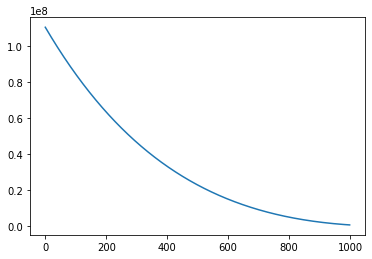

In [217]:
plt.plot(range(1000), no_bias_LR.cost_list)
plt.show()

【問題9】（アドバンス課題）特徴量の多次元化

In [225]:
# 入力を3次元で実施
x_train = train[['GrLivArea', 'YearBuilt', 'LotArea']]
target = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(x_train, target, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [226]:
LR_3 = ScratchLinearRegression(bias=True, verbose=True)
LR_3.fit(X_train, y_train)

1 / 1000 times done | loss value: 63324091.87793017
2 / 1000 times done | loss value: 59375582.3037605
3 / 1000 times done | loss value: 55612036.3813758
4 / 1000 times done | loss value: 52026812.69968253
5 / 1000 times done | loss value: 48613488.00524299
6 / 1000 times done | loss value: 45365850.30229486
7 / 1000 times done | loss value: 42277892.16719649
8 / 1000 times done | loss value: 39343804.27069048
9 / 1000 times done | loss value: 36557969.10158173
10 / 1000 times done | loss value: 33914954.885622256
11 / 1000 times done | loss value: 31409509.69358539
12 / 1000 times done | loss value: 29036555.73269725
13 / 1000 times done | loss value: 26791183.815771513
14 / 1000 times done | loss value: 24668648.002567925
15 / 1000 times done | loss value: 22664360.408062495
16 / 1000 times done | loss value: 20773886.17248079
17 / 1000 times done | loss value: 18992938.58810364
18 / 1000 times done | loss value: 17317374.37800776
19 / 1000 times done | loss value: 15743189.122052552

511 / 1000 times done | loss value: 70749416.90652679
512 / 1000 times done | loss value: 70750969.76400833
513 / 1000 times done | loss value: 70752498.73221812
514 / 1000 times done | loss value: 70754004.17841788
515 / 1000 times done | loss value: 70755486.46423101
516 / 1000 times done | loss value: 70756945.94572882
517 / 1000 times done | loss value: 70758382.97351554
518 / 1000 times done | loss value: 70759797.89281209
519 / 1000 times done | loss value: 70761191.0435386
520 / 1000 times done | loss value: 70762562.76039536
521 / 1000 times done | loss value: 70763913.37294309
522 / 1000 times done | loss value: 70765243.20568132
523 / 1000 times done | loss value: 70766552.57812627
524 / 1000 times done | loss value: 70767841.80488694
525 / 1000 times done | loss value: 70769111.19574036
526 / 1000 times done | loss value: 70770361.05570577
527 / 1000 times done | loss value: 70771591.6851173
528 / 1000 times done | loss value: 70772803.37969592
529 / 1000 times done | loss v

825 / 1000 times done | loss value: 70849547.96111947
826 / 1000 times done | loss value: 70849559.86653057
827 / 1000 times done | loss value: 70849571.58866127
828 / 1000 times done | loss value: 70849583.13033319
829 / 1000 times done | loss value: 70849594.49432437
830 / 1000 times done | loss value: 70849605.68337007
831 / 1000 times done | loss value: 70849616.70016357
832 / 1000 times done | loss value: 70849627.5473567
833 / 1000 times done | loss value: 70849638.2275603
834 / 1000 times done | loss value: 70849648.7433452
835 / 1000 times done | loss value: 70849659.09724244
836 / 1000 times done | loss value: 70849669.29174429
837 / 1000 times done | loss value: 70849679.32930467
838 / 1000 times done | loss value: 70849689.21233954
839 / 1000 times done | loss value: 70849698.94322774
840 / 1000 times done | loss value: 70849708.52431162
841 / 1000 times done | loss value: 70849717.95789732
842 / 1000 times done | loss value: 70849727.24625549
843 / 1000 times done | loss va

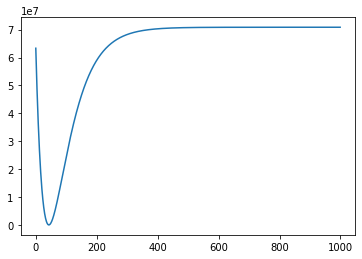

In [227]:
plt.plot(range(1000), LR_3.cost_list)
plt.show()

自力実装したもので3次元の特徴量で勾配計算を同じ条件で行うと、損失値の増減が激しくなることがわかる。

【問題10】（アドバンス課題）更新式の導出

<center><img src="S__127909891.jpg"　width=800px></center>

【問題11】（アドバンス課題）局所最適解の問題

自力証明はできなかったので、恐らくこれが正解と思うサイトを以下に掲載<br>
http://www.st.nanzan-u.ac.jp/info/marble/book/chapter11.pdf<br>